In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#_______ Data Exploration _________#

#import the training and test data set

train_df = pd.read_csv("E:\Aegis\Python\project/Train_UWu5bXk.csv")

test_df = pd.read_csv("E:\Aegis\Python\project/Test_u94Q5KV.csv")

In [3]:
print "Training set size is: " , train_df.shape
print "Test Set size is: " , test_df.shape

Training set size is:  (8523, 12)
Test Set size is:  (5681, 11)


In [4]:
#Now make a new column of "train" in train data set and "test" in test data set
train_df['Type'] = "Train"
test_df['Type'] = "Test"

In [5]:
#now join the training and test Data
data = pd.concat([train_df, test_df], ignore_index = True)
print train_df.shape, test_df.shape, data.shape

(8523, 13) (5681, 12) (14204, 13)


In [6]:
#Now see the data 
print data.head()

  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.000000        19.20   
4              Household         0.000000         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999       

In [7]:
print data.tail()

      Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
14199          Regular           FDB58  141.3154                NaN   
14200          Regular           FDD47  169.1448                NaN   
14201          Low Fat           NCO17  118.7440                NaN   
14202          Regular           FDJ26  214.6218                NaN   
14203          Regular           FDU37   79.7960                NaN   

                Item_Type  Item_Visibility  Item_Weight  \
14199         Snack Foods         0.013496         10.5   
14200       Starchy Foods         0.142991          7.6   
14201  Health and Hygiene         0.073529         10.0   
14202              Canned         0.000000         15.3   
14203              Canned         0.104720          9.5   

       Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
14199                       1997            OUT046               Tier 1   
14200                       2009            OUT018               Tie

In [8]:
#_________ Data Cleaning _______#

# Missing Value Treatment:

#Now see the no.of missing values in the data set

data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Type                            0
dtype: int64

In [9]:
#ignore Outlet sales because -for test set we don't have outletsales
#There are missing values for Item_weight and Outlet_Size

In [10]:
#now perform summary steps on the data
print data.describe()

           Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000                NaN         0.027036           NaN   
50%      142.247000                NaN         0.054021           NaN   
75%      185.855600                NaN         0.094037           NaN   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year  
count               14204.000000  
mean                 1997.830681  
std                     8.371664  
min                  1985.000000  
25%                  1987.000000  
50%                  1999.000000  
75%                  2004.000000  
max                  2009.000000  


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [11]:
#Look at no.of categorical variables in the data
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
Type                             2
dtype: int64

In [12]:
# This shows the following are categorical variables
#   Item_Fat_Content          -> 5
#   Item_Type                 -> 16
#   Outlet_Establishment_Year -> 9
#   Outlet_Identifier         -> 10
#   Outlet_Location_Type      -> 3
#   Outlet_Size               -> 4
#   Outlet_Type               -> 4

In [13]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Type                          object
dtype: object

In [14]:
#filter the categorical variable
categorical = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
#Remove the index and Type of data set
categorical = [x for x in categorical  if x not in ['Item_Identifier','Outlet_Identifier','Type']]
#Now print the frequency of categorical variables
for col in categorical:
    print '\n Frequencies of categories of variable : %s'%col
    print data[col].value_counts()


 Frequencies of categories of variable : Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Frequencies of categories of variable : Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 Frequencies of categories of variable : Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

 Frequencies of categories of variable : Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_S

In [15]:
#Missing values imputation
#Determine the avg weight per item
item_avg_weight = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')

#Check the index of missing values by getting their boolean variables
miss_bool = data['Item_Weight'].isnull()

#impute weights and check missing values before and after imputation
print 'Original Missing values: %d'%sum(miss_bool)

data.loc[miss_bool, 'Item_Weight'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: item_avg_weight[x])


print 'Final Missing values are : %d'%sum(data['Item_Weight'].isnull())

Original Missing values: 2439
Final Missing values are : 0


In [16]:
#Check the data set now
data.describe()
#Everything looks good

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.793380,1997.830681
std,62.086938,1706.499616,0.051459,4.651716,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,NaN,0.027036,8.710000,1987.000000
50%,142.247000,NaN,0.054021,12.600000,1999.000000
75%,185.855600,NaN,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [17]:
#Outlet_Size have missing values. So impute them with mode of outlet_size of particular type
from scipy.stats import mode

#Determine the mode for each one
outlet_size_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: mode(x).mode[0]))

print "Mode for each Outlet_type: ", outlet_size_mode

#Identify the index of missing values
miss_bool = data['Outlet_Size'].isnull()

#impute missing values with mode
print '\n Original Missing values: %d'%sum(miss_bool)

data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

print '\n After imputation missinng values: %d'%sum(data['Outlet_Size'].isnull())

Mode for each Outlet_type:  Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

 Original Missing values: 4016

 After imputation missinng values: 0


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [18]:
#Now final check whether there are any missing values
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Type                            0
dtype: int64

In [19]:
#item_identifier is given minimum value as 0, so change it
#Determine the avg visibility of the product
visibility_avg = data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')

#impute 0 with mean visibility of that product

miss_bool = (data['Item_Visibility'] == 0)

print 'Number of 0 values present initially are: %d'%sum(miss_bool)

data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x: visibility_avg[x])

print 'Number of 0 values after impuation: %d'%sum(data['Item_Visibility'] == 0)

Number of 0 values present initially are: 879
Number of 0 values after impuation: 0


In [20]:
#As Visibility is more then item is more likey to be sold.
#So find the Avg_visibility of all stores and compare with Avg_visibility of each store

data['Item_Visibility_MeanRatio'] = data.apply(lambda x:x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis = 1)
print data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [21]:
#Since there are 16 categories of Item_Identifier, They are classified among Food, Drinks, Non-Consumable in different ways
#So bring down them to 3 categories
#Get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#
#Now rename them as follows
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food',
                                                             'NC': 'Non-Consumable',
                                                             'DR': 'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [22]:
#_________ Feature Engineering ______#

#Since year is mentioned in the data set
#Caluclate the no of years from now

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [23]:
#There are mis-typed spellings in Item_Fat_Content
#So make everything under similar types
print "Originally present names: "
print data['Item_Fat_Content'].value_counts()

print "\nModified names: "
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                             'reg': 'Regular',
                                                             'low fat': 'Low Fat'})

print data['Item_Fat_Content'].value_counts()

Originally present names: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified names: 
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [24]:
#There is Non-Consumable Item, so remove fat-content data for that item
data.loc[data['Item_Type_Combined'] =="Non-Consumable", 'Item_Fat_Content'] ='Non-Edible' 
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [25]:
# Scikit-learn accepts only numerical variables
# So convert the categorical variables in the data to numerical variables
#import library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#create a new variable outlet

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

le = LabelEncoder()

for i in var:
    data[i] = le.fit_transform(data[i])

In [26]:
#This will also generate some dummy variables. So remove them

data = pd.get_dummies(data, columns =['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
                                      'Item_Type_Combined', 'Outlet'])

In [27]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Type                          object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
Outlet_Type_3                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
O

In [28]:
# Take a look at Item_Type_Combined

data[['Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2']].head(5)

,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [29]:
#___________ Exporting Data___________#

#Now drop the columns which have  been converted

data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

#Divide back Train and Test data sets

train = data.loc[data['Type'] == "Train"]
test = data.loc[data['Type'] == "Test"]

#Drop the columns which are not required

test.drop(['Item_Outlet_Sales', 'Type'], axis =1, inplace = True)
train.drop(['Type'], axis = 1, inplace = True)

#Export files as train.csv and test.csv

train.to_csv("train_mod.csv", index = False)
test.to_csv("test_mod.csv", index = False)


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
# Training data
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,1.000000,15,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,1.000000,26,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#_______ Model Building _________#

#Create a function for all models

target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    
    #fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    
    #predict the training data set
    
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #perform cross validation
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv =20, scoring = 'mean_squared_error')
    
    cv_score = np.sqrt(np.abs(cv_score))
    
    #print the model report
    
    print "\n Report "
    
    print "RMSE: %.4g" %np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    
    print "CV Score:  Mean- %.4g | std- %.4g | Min- %.4g | Max- %.4g" %(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score))
    
    #Predict the test dataset
    
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export the submission file
    
    IDcol.append(target)
    submission = pd.DataFrame({x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index= False)


 Report 
RMSE: 1128
CV Score:  Mean- 1130 | std- 44.24 | Min- 1074 | Max- 1217


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


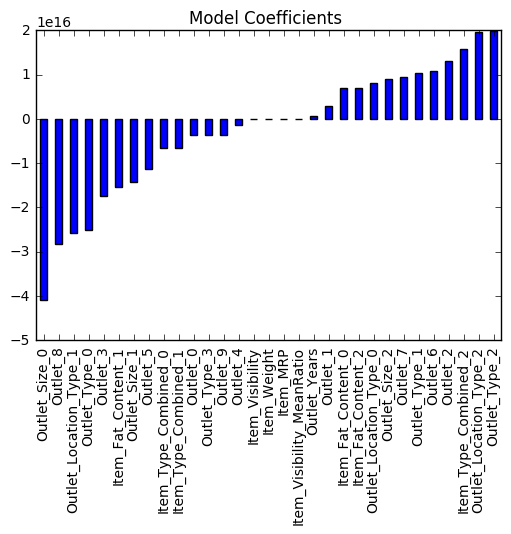

In [32]:
#Now run the Linear-Regression model

from sklearn.linear_model import LinearRegression, Ridge, Lasso

predictors = [x for x in train.columns if x not in [target] + IDcol]

#print predictions

alg1 = LinearRegression(normalize = True)

modelfit(alg1, train, test, predictors, target, IDcol, 'Linear_Output1.csv')

#print alg1.coef_

%matplotlib inline

coef1 = pd.Series(alg1.coef_, predictors).sort_values()

coef1.plot(kind = 'bar', title ='Model Coefficients ')


 Report 
RMSE: 1129
CV Score:  Mean- 1130 | std- 44.6 | Min- 1076 | Max- 1217


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


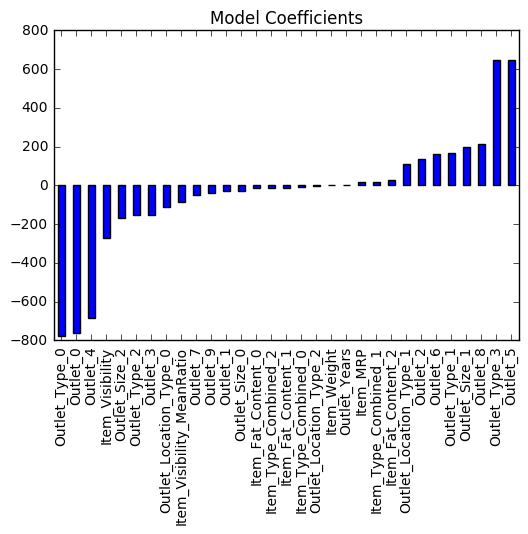

In [33]:
# Since coefficients are very large use Ridge Regression Model

predictors = [x for x in train.columns if x not in [target] + IDcol]

alg2 = Ridge(alpha = 0.05, normalize = True)

modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')

coef2 = pd.Series(alg2.coef_, predictors).sort_values()

coef2.plot(kind = 'bar', title = "Model Coefficients")


 Report 
RMSE: 1058
CV Score:  Mean- 1091 | std- 45.42 | Min- 1003 | Max- 1186


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


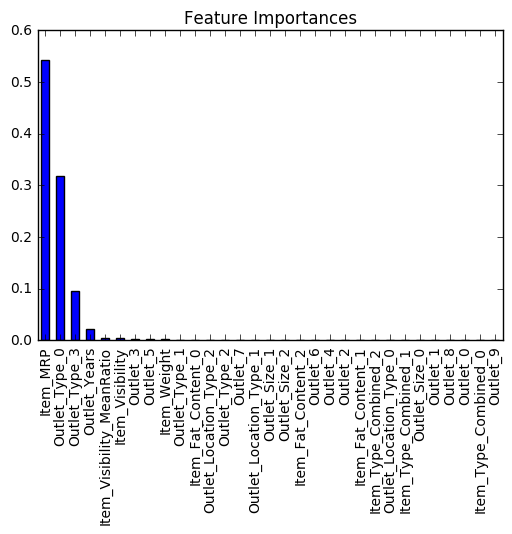

In [34]:
#Decission Tree Model

from sklearn.tree import DecisionTreeRegressor

predictors = [ x for x in train.columns if x not in [target]+IDcol]

alg3 = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)

modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')

coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending = False)

coef3.plot(kind = 'bar', title = 'Feature Importances')



 Report 
RMSE: 1071
CV Score:  Mean- 1096 | std- 43.3 | Min- 1027 | Max- 1172


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


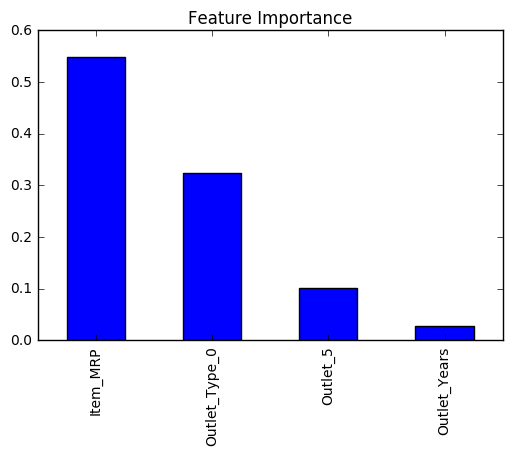

In [35]:
#Since here there 4 variables with high importance, use these

predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
alg4 = DecisionTreeRegressor(max_depth = 8, min_samples_leaf = 150)

modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')

coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending = False)

coef4.plot(kind ='bar', title = 'Feature Importance')



 Report 
RMSE: 1073
CV Score:  Mean- 1084 | std- 44.15 | Min- 1019 | Max- 1162


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


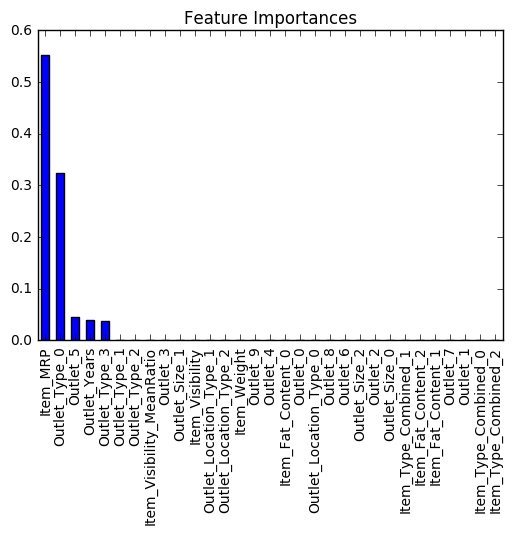

In [36]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]

alg5 = RandomForestRegressor(n_estimators = 200, max_depth =5, min_samples_leaf =100, n_jobs = 4)

modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')

coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending = False)

coef5.plot(kind = 'bar', title = "Feature Importances")



 Report 
RMSE: 1068
CV Score:  Mean- 1083 | std- 43.75 | Min- 1020 | Max- 1161


C:\Users\Ajith Vajrala\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


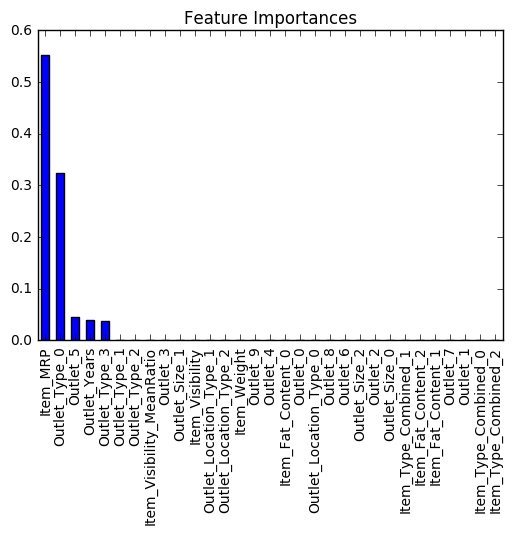

In [37]:
# Try another Random Forest Model

#from sklearn.ensemble import RandomForestRegressor

predictors = [x for x in train.columns if x not in [target]+IDcol]

alg6 = RandomForestRegressor(n_estimators = 400, max_depth =6, min_samples_leaf =100, n_jobs = 4)

modelfit(alg6, train, test, predictors, target, IDcol, 'alg6.csv')

coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending = False)

coef5.plot(kind = 'bar', title = "Feature Importances")


In [ ]:
# GraientBoost